**Install Libraries**:

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

**Import Libraries:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Upload and Load the Dataset:**

In [6]:
from google.colab import files
uploaded = files.upload()  # Select your file when prompted

# Load the dataset into a pandas DataFrame
filename = list(uploaded.keys())[0]
data = pd.read_csv('IMDb Movies India.csv', encoding='latin-1') # or 'cp1252' or other encodings

# Display basic information about the dataset
print(data.head())
print(data.info())

Saving IMDb Movies India.csv to IMDb Movies India (2).csv
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvin

**Explore and Clean the Data:**

In [7]:
print(data.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


**Handle missing values (if any exist):**

In [8]:
data = data.dropna()  # Drop rows with missing values

**Select Features and Target:**

In [9]:
features = ['genre', 'director', 'actors']  # Replace with the actual column names in your dataset
target = 'rating'  # Replace with the target column name

In [12]:
# Print the column names of your dataframe:
print(data.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [22]:
# Define features and target
features = ['Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

X = data[features]  # Features
y = data[target]    # Target

In [23]:
X = pd.get_dummies(X, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

**Split the Data into Training and Testing Sets:**

In [24]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the dimensions of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4527, 9641)
X_test shape: (1132, 9641)
y_train shape: (4527,)
y_test shape: (1132,)


In [25]:
data = data.dropna()  # Remove rows with missing values

In [28]:
# Replace inplace=True with explicit assignment for X_train
X_train['Duration'] = X_train['Duration'].fillna(X_train['Duration'].mean())

# Replace inplace=True with explicit assignment for X_test
X_test['Duration'] = X_test['Duration'].fillna(X_test['Duration'].mean())

In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Train the Model:**

In [34]:
from sklearn.linear_model import LinearRegression

**Check for Errors in Your Data:**

In [37]:
# Check for null values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check data types
print(X_train.dtypes)
print(y_train.dtypes)

Duration                              0
Votes                                 0
Genre_Action, Adventure               0
Genre_Action, Adventure, Biography    0
Genre_Action, Adventure, Comedy       0
                                     ..
Actor 3_Zeeshan Khan                  0
Actor 3_Zeishan Quadri                0
Actor 3_Zenobia Shroff                0
Actor 3_Zoya Hussain                  0
Actor 3_Zulfi Sayed                   0
Length: 9641, dtype: int64
0
Duration                              float64
Votes                                 float64
Genre_Action, Adventure                  bool
Genre_Action, Adventure, Biography       bool
Genre_Action, Adventure, Comedy          bool
                                       ...   
Actor 3_Zeeshan Khan                     bool
Actor 3_Zeishan Quadri                   bool
Actor 3_Zenobia Shroff                   bool
Actor 3_Zoya Hussain                     bool
Actor 3_Zulfi Sayed                      bool
Length: 9641, dtype: obje

**Verify the Shapes of X_train and y_train:**

In [38]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (4527, 9641)
y_train shape: (4527,)


In [39]:
y_train = y_train.values.ravel()  # Convert to 1D if needed

**Handle Categorical Features:**

In [40]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align train and test sets to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill any missing columns in X_test

**Scale Your Features (Optional for Linear Regression):**

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Debug the Model Training:**

In [44]:
try:
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("Model trained successfully!")
except Exception as e:
    print("An error occurred:", e)


Model trained successfully!


**Make Predictions:**

In [45]:
y_pred = model.predict(X_test)

**Evaluate the Model:**

In [46]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10.165296114901338
R-squared: -4.489580664223983


**Visualize the Results:**

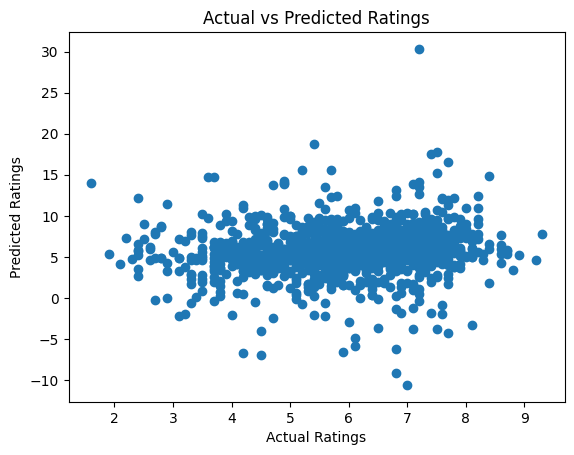

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()